Step 1: Load dependency-parsed sentences --> Parse from CoNLL-U or JSON into `Word` and `Sentence`

Step 2: Load word alignments --> Convert SimAlign output to Pharaoh format

Step 3: Create `AlignedSentences`

Step 4: Compute metrics (cross, astred_op, dep_changes, etc.)

Step 5: Store results in DataFrame

Step 6: Aggregate statistics (e.g., avg cross per strategy or text)

Step 7: Visualize (optional)


In [ ]:
!pip install astred pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
import json
import pandas as pd
from astred import AlignedSentences, Sentence, Word
from google.colab import files
import io

In [ ]:
uploaded = files.upload() # chnage filename --> dicionario & velhos apedido...

Saving velhos-apedidos-e-velhos-anúncios_st_ht.align.json to velhos-apedidos-e-velhos-anúncios_st_ht.align.json
Saving o-nosso-feminism_st_ht.align.json to o-nosso-feminism_st_ht.align.json
Saving o-nosso-feminism_st_mt.align.json to o-nosso-feminism_st_mt.align.json
Saving o-pavilhão-e-a-pinel_mt_pemt.align.json to o-pavilhão-e-a-pinel_mt_pemt.align.json
Saving o-pavilhão-e-a-pinel_st_mt.align.json to o-pavilhão-e-a-pinel_st_mt.align.json
Saving o-pavilhão-e-a-pinel_st_pemt.align.json to o-pavilhão-e-a-pinel_st_pemt.align.json
Saving papel-moeda_mt_ht.align.json to papel-moeda_mt_ht.align.json
Saving papel-moeda_st_ht.align.json to papel-moeda_st_ht.align.json
Saving papel-moeda_st_mt.align.json to papel-moeda_st_mt.align.json
Saving qualquer-serve_mt_ht.align.json to qualquer-serve_mt_ht.align.json
Saving qualquer-serve_st_ht.align.json to qualquer-serve_st_ht.align.json
Saving qualquer-serve_st_mt.align.json to qualquer-serve_st_mt.align.json
Saving uma-anedota_mt_ht.align.json to u

In [ ]:
def has_single_root(heads_1_based):
    return heads_1_based.count(0) == 1

def filter_sentences(data):
    """
    Input: list of sentence pairs (dicts) loaded from one .align.json file
    Output: filtered list with only sentences where src & tgt each have exactly one root
    """
    filtered = []
    for item in data:
        src_heads = item['src']['heads_1_based']
        tgt_heads = item['tgt']['heads_1_based']
        if has_single_root(src_heads) and has_single_root(tgt_heads):
            filtered.append(item)
    return filtered

# Now process all uploaded files

all_stats = []  # will hold stats per file

for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)
    total = len(data)
    filtered_data = filter_sentences(data)
    kept = len(filtered_data)
    removed = total - kept
    all_stats.append({
        'filename': filename,
        'total': total,
        'kept': kept,
        'removed': removed,
        'percentage_kept': 100 * kept / total if total > 0 else 0
    })

    # Optionally overwrite the original file or save filtered version
    filtered_filename = filename.replace('.align.json', '.filtered.json')
    with open(filtered_filename, 'w', encoding='utf-8') as f_out:
        json.dump(filtered_data, f_out, ensure_ascii=False, indent=2)

print("Filtering done. Summary per file:")
for stat in all_stats:
    print(stat)

Filtering done. Summary per file:
{'filename': 'velhos-apedidos-e-velhos-anúncios_st_ht.align.json', 'total': 100, 'kept': 100, 'removed': 0, 'percentage_kept': 100.0}
{'filename': 'o-nosso-feminism_st_ht.align.json', 'total': 31, 'kept': 31, 'removed': 0, 'percentage_kept': 100.0}
{'filename': 'o-nosso-feminism_st_mt.align.json', 'total': 31, 'kept': 31, 'removed': 0, 'percentage_kept': 100.0}
{'filename': 'o-pavilhão-e-a-pinel_mt_pemt.align.json', 'total': 88, 'kept': 88, 'removed': 0, 'percentage_kept': 100.0}
{'filename': 'o-pavilhão-e-a-pinel_st_mt.align.json', 'total': 88, 'kept': 88, 'removed': 0, 'percentage_kept': 100.0}
{'filename': 'o-pavilhão-e-a-pinel_st_pemt.align.json', 'total': 88, 'kept': 88, 'removed': 0, 'percentage_kept': 100.0}
{'filename': 'papel-moeda_mt_ht.align.json', 'total': 19, 'kept': 19, 'removed': 0, 'percentage_kept': 100.0}
{'filename': 'papel-moeda_st_ht.align.json', 'total': 19, 'kept': 19, 'removed': 0, 'percentage_kept': 100.0}
{'filename': 'papel-m

In [ ]:
print("\\begin{table}[ht]")
print("\\centering")
print("\\begin{tabular}{lrrrr}")
print("\\hline")
print("Filename & Total Sentences & Kept & Removed & Kept \% \\\\")
print("\\hline")

for stat in all_stats:
    print(f"{stat['filename']} & {stat['total']} & {stat['kept']} & {stat['removed']} & {stat['percentage_kept']:.2f} \\\\")

print("\\hline")
print("\\end{tabular}")
print("\\caption{Sentence filtering based on single root detection in source and target sentences}")
print("\\label{tab:sentence_filtering}")
print("\\end{table}")

\begin{table}[ht]
\centering
\begin{tabular}{lrrrr}
\hline
Filename & Total Sentences & Kept & Removed & Kept \% \\
\hline
velhos-apedidos-e-velhos-anúncios_st_ht.align.json & 100 & 100 & 0 & 100.00 \\
o-nosso-feminism_st_ht.align.json & 31 & 31 & 0 & 100.00 \\
o-nosso-feminism_st_mt.align.json & 31 & 31 & 0 & 100.00 \\
o-pavilhão-e-a-pinel_mt_pemt.align.json & 88 & 88 & 0 & 100.00 \\
o-pavilhão-e-a-pinel_st_mt.align.json & 88 & 88 & 0 & 100.00 \\
o-pavilhão-e-a-pinel_st_pemt.align.json & 88 & 88 & 0 & 100.00 \\
papel-moeda_mt_ht.align.json & 19 & 19 & 0 & 100.00 \\
papel-moeda_st_ht.align.json & 19 & 19 & 0 & 100.00 \\
papel-moeda_st_mt.align.json & 19 & 19 & 0 & 100.00 \\
qualquer-serve_mt_ht.align.json & 30 & 29 & 1 & 96.67 \\
qualquer-serve_st_ht.align.json & 30 & 30 & 0 & 100.00 \\
qualquer-serve_st_mt.align.json & 30 & 29 & 1 & 96.67 \\
uma-anedota_mt_ht.align.json & 30 & 30 & 0 & 100.00 \\
uma-anedota_st_ht.align.json & 30 & 30 & 0 & 100.00 \\
uma-anedota_st_mt.align.json & 30 &

<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipython-input-766488303.py:5: SyntaxWarning: invalid escape sequence '\%'
  print("Filename & Total Sentences & Kept & Removed & Kept \% \\\\")


In [ ]:
def filter_and_collect_removed(data):
    removed = []
    kept = []
    for item in data:
        src_heads = item['src']['heads_1_based']
        tgt_heads = item['tgt']['heads_1_based']
        src_roots = src_heads.count(0)
        tgt_roots = tgt_heads.count(0)
        if src_roots == 1 and tgt_roots == 1:
            kept.append(item)
        else:
            removed.append({
                'src_sentence': item['src']['tokens'],
                'tgt_sentence': item['tgt']['tokens'],
                'src_heads': src_heads,
                'tgt_heads': tgt_heads,
                'src_roots': src_roots,
                'tgt_roots': tgt_roots,
                'alignment': item.get('alignment', None)  # or whatever field contains alignment info
            })
    return kept, removed

In [ ]:
for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)

    kept, removed = filter_and_collect_removed(data)

    print(f"File: {filename}")
    print(f"Total sentences: {len(data)}")
    print(f"Kept sentences: {len(kept)}")
    print(f"Removed sentences: {len(removed)}")
    print("-" * 40)

    if removed:
        print("Removed sentences details:")
        for i, rem in enumerate(removed):
            print(f"\nRemoved sentence #{i+1}:")
            print(f"  Source tokens: {rem['src_sentence']}")
            print(f"  Target tokens: {rem['tgt_sentence']}")
            print(f"  Source heads (1-based): {rem['src_heads']} (roots: {rem['src_roots']})")
            print(f"  Target heads (1-based): {rem['tgt_heads']} (roots: {rem['tgt_roots']})")
            if rem['alignment']:
                print(f"  Alignment: {rem['alignment']}")
            else:
                print("  Alignment: Not available")
        print("=" * 60)

File: velhos-apedidos-e-velhos-anúncios_st_ht.align.json
Total sentences: 100
Kept sentences: 100
Removed sentences: 0
----------------------------------------
File: o-nosso-feminism_st_ht.align.json
Total sentences: 31
Kept sentences: 31
Removed sentences: 0
----------------------------------------
File: o-nosso-feminism_st_mt.align.json
Total sentences: 31
Kept sentences: 31
Removed sentences: 0
----------------------------------------
File: o-pavilhão-e-a-pinel_mt_pemt.align.json
Total sentences: 88
Kept sentences: 88
Removed sentences: 0
----------------------------------------
File: o-pavilhão-e-a-pinel_st_mt.align.json
Total sentences: 88
Kept sentences: 88
Removed sentences: 0
----------------------------------------
File: o-pavilhão-e-a-pinel_st_pemt.align.json
Total sentences: 88
Kept sentences: 88
Removed sentences: 0
----------------------------------------
File: papel-moeda_mt_ht.align.json
Total sentences: 19
Kept sentences: 19
Removed sentences: 0
------------------------

In [ ]:
def has_single_root(heads_0_based=None, heads_1_based=None):
    if heads_0_based is not None:
        return heads_0_based.count(-1) == 1
    if heads_1_based is not None:
        return heads_1_based.count(0) == 1
    raise ValueError("Must provide either heads_0_based or heads_1_based")

In [ ]:
aligned_results = {}

for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)

    file_results = {}

    for entry in data:
        index = entry['index']
        src = entry['src']
        tgt = entry['tgt']

        # Skip sentence pairs without exactly one root in both src and tgt
        if not (has_single_root(heads_1_based=src['heads_1_based']) and
                has_single_root(heads_1_based=tgt['heads_1_based'])):
            print(f"[{filename}] Skipping index {index} due to missing/multiple roots.")
            continue

        alignments_all = entry['alignments']

        # Use 1-based heads directly (correct for ASTrED)
        src_tokens = src['tokens']
        src_heads = src['heads_1_based']
        src_deprels = src['deprels']

        tgt_tokens = tgt['tokens']
        tgt_heads = tgt['heads_1_based']
        tgt_deprels = tgt['deprels']

        entry_results = {}
        for strategy in ['mwmf', 'inter', 'itermax']:
            # Recreate Sentence objects fresh each time to avoid NULL conflict
            src_sent = Sentence(words=[
                Word(id=i+1, text=tok, head=head, deprel=deprel)
                for i, (tok, head, deprel) in enumerate(zip(src_tokens, src_heads, src_deprels))
            ])
            tgt_sent = Sentence(words=[
                Word(id=i+1, text=tok, head=head, deprel=deprel)
                for i, (tok, head, deprel) in enumerate(zip(tgt_tokens, tgt_heads, tgt_deprels))
            ])

            alignment = alignments_all.get(strategy, [])
            aligned = AlignedSentences(src_sent, tgt_sent, word_aligns=alignment)
            entry_results[strategy] = aligned

        # ✅ Store result per sentence index (was missing)
        file_results[index] = entry_results

    aligned_results[filename] = file_results


[qualquer-serve_mt_ht.align.json] Skipping index 22 due to missing/multiple roots.
[qualquer-serve_st_mt.align.json] Skipping index 22 due to missing/multiple roots.
[uma-lembrança_mt_ht.align.json] Skipping index 14 due to missing/multiple roots.
[uma-lembrança_mt_ht.align.json] Skipping index 18 due to missing/multiple roots.
[uma-lembrança_st_ht.align.json] Skipping index 14 due to missing/multiple roots.
[uma-lembrança_st_ht.align.json] Skipping index 18 due to missing/multiple roots.
[uma-lembrança_st_mt.align.json] Skipping index 14 due to missing/multiple roots.
[uma-lembrança_st_mt.align.json] Skipping index 18 due to missing/multiple roots.
[linhas-de-tiro_mt_ht.align.json] Skipping index 6 due to missing/multiple roots.
[linhas-de-tiro_st_ht.align.json] Skipping index 6 due to missing/multiple roots.
[a-cartomante_st_ht.align.json] Skipping index 159 due to missing/multiple roots.
[a-cartomante_st_mt.align.json] Skipping index 58 due to missing/multiple roots.
[a-cartomante_s

In [ ]:
# check for problems
for filename, file_results in aligned_results.items():
    for index, strategies in file_results.items():
        for strategy, aligned in strategies.items():
            for sent, label in [(aligned.src, 'SRC'), (aligned.tgt, 'TGT')]:
                roots = [w for w in sent.words if w.head == 0]
                if len(roots) != 1:
                    print(f"⚠️ {filename} | index={index} | strategy={strategy} | {label} has {len(roots)} roots")
                    print("Heads:", [w.head for w in sent.words])
                    print("IDs:  ", [w.id for w in sent.words])

In [ ]:
from collections import defaultdict

file_stats = defaultdict(lambda: {'total': 0, 'skipped': 0, 'usable': 0})

for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)

    for entry in data:
        file_stats[filename]['total'] += 1
        src_heads = entry['src']['heads_1_based']
        tgt_heads = entry['tgt']['heads_1_based']
        if not (has_single_root(heads_1_based=src_heads) and has_single_root(heads_1_based=tgt_heads)):
            file_stats[filename]['skipped'] += 1

    file_stats[filename]['usable'] = (
        file_stats[filename]['total'] - file_stats[filename]['skipped']
    )

In [ ]:
import re

def latex_escape(text):
    # Escape LaTeX special characters
    text = text.replace('\\', r'\textbackslash{}')
    text = text.replace('_', r'\_')
    text = text.replace('%', r'\%')
    text = text.replace('&', r'\&')
    text = text.replace('#', r'\#')
    text = text.replace('{', r'\{')
    text = text.replace('}', r'\}')
    text = text.replace('~', r'\textasciitilde{}')
    text = text.replace('^', r'\textasciicircum{}')
    text = text.replace('ç', r'\c{c}')
    text = text.replace('ã', r'\~a')
    text = text.replace('á', r"\'a")
    return text

In [ ]:
print(r"\begin{table}[ht]")
print(r"\centering")
print(r"\begin{tabular}{lrrr}")
print(r"\toprule")
print(r"File & Total & Skipped & Usable \\")
print(r"\midrule")

for filename, stats in sorted(file_stats.items()):
    shortname = filename.replace('.align.json', '')
    escaped_name = latex_escape(shortname)
    print(f"\\texttt{{{escaped_name}}} & {stats['total']} & {stats['skipped']} & {stats['usable']} \\\\")

print(r"\bottomrule")
print(r"\end{tabular}")
print(r"\caption{Overview of sentence counts per file after filtering for well-formed trees (exactly one root).}")
print(r"\label{tab:sentence-counts}")
print(r"\end{table}")

\begin{table}[ht]
\centering
\begin{tabular}{lrrr}
\toprule
File & Total & Skipped & Usable \\
\midrule
\texttt{a-cartomante\_mt\_ht} & 199 & 1 & 198 \\
\texttt{a-cartomante\_st\_ht} & 199 & 1 & 198 \\
\texttt{a-cartomante\_st\_mt} & 199 & 2 & 197 \\
\texttt{a-lei\_mt\_ht} & 13 & 0 & 13 \\
\texttt{a-lei\_st\_ht} & 13 & 0 & 13 \\
\texttt{a-lei\_st\_mt} & 13 & 0 & 13 \\
\texttt{a-quest\~ao-dos-telefones\_mt\_ht} & 29 & 0 & 29 \\
\texttt{a-quest\~ao-dos-telefones\_st\_ht} & 29 & 0 & 29 \\
\texttt{a-quest\~ao-dos-telefones\_st\_mt} & 29 & 0 & 29 \\
\texttt{a-volta\_mt\_ht} & 10 & 0 & 10 \\
\texttt{a-volta\_st\_ht} & 10 & 0 & 10 \\
\texttt{a-volta\_st\_mt} & 10 & 0 & 10 \\
\texttt{as-vaporosas\_mt\_ht} & 19 & 0 & 19 \\
\texttt{as-vaporosas\_st\_ht} & 19 & 0 & 19 \\
\texttt{as-vaporosas\_st\_mt} & 19 & 0 & 19 \\
\texttt{cada-ra\c{c}a-tem-um-calino\_mt\_ht} & 83 & 1 & 82 \\
\texttt{cada-ra\c{c}a-tem-um-calino\_st\_ht} & 83 & 2 & 81 \\
\texttt{cada-ra\c{c}a-tem-um-calino\_st\_mt} & 83 & 1 & 82

In [ ]:
print(r"""\begin{table}[htb]
  \centering
  \caption{Files with malformed dependency trees (multiple or missing roots).}
  \label{tab:malformed_trees}
  \vspace{0.5em}
  \begin{tabular}{|l|c|c|c|}
    \hline
    \textbf{File} & \textbf{Total} & \textbf{Skipped} & \textbf{Usable} \\
    \hline""")

for filename, stats in sorted(file_stats.items()):
    if stats['skipped'] == 0:
        continue  # only include problematic files
    shortname = filename.replace('.align.json', '')
    escaped_name = latex_escape(shortname)
    print(f"    \\texttt{{{escaped_name}}} & {stats['total']} & {stats['skipped']} & {stats['usable']} \\\\")

print(r"""    \hline
  \end{tabular}
\end{table}""")

\begin{table}[htb]
  \centering
  \caption{Files with malformed dependency trees (multiple or missing roots).}
  \label{tab:malformed_trees}
  \vspace{0.5em}
  \begin{tabular}{|l|c|c|c|}
    \hline
    \textbf{File} & \textbf{Total} & \textbf{Skipped} & \textbf{Usable} \\
    \hline
    \texttt{a-cartomante\_mt\_ht} & 199 & 1 & 198 \\
    \texttt{a-cartomante\_st\_ht} & 199 & 1 & 198 \\
    \texttt{a-cartomante\_st\_mt} & 199 & 2 & 197 \\
    \texttt{cada-ra\c{c}a-tem-um-calino\_mt\_ht} & 83 & 1 & 82 \\
    \texttt{cada-ra\c{c}a-tem-um-calino\_st\_ht} & 83 & 2 & 81 \\
    \texttt{cada-ra\c{c}a-tem-um-calino\_st\_mt} & 83 & 1 & 82 \\
    \texttt{linhas-de-tiro\_mt\_ht} & 24 & 1 & 23 \\
    \texttt{linhas-de-tiro\_st\_ht} & 24 & 1 & 23 \\
    \texttt{qualquer-serve\_mt\_ht} & 30 & 1 & 29 \\
    \texttt{qualquer-serve\_st\_mt} & 30 & 1 & 29 \\
    \texttt{uma-lembran\c{c}a\_mt\_ht} & 21 & 2 & 19 \\
    \texttt{uma-lembran\c{c}a\_st\_ht} & 21 & 2 & 19 \\
    \texttt{uma-lembran\c{c}a\_st\_

# WLC, POS changes, word cross, seq cross & SACr

In [ ]:
def print_metrics_for_aligned_results(aligned_results):
    for filename, file_results in aligned_results.items():
        print(f"File: {filename}")
        for sent_index, strategies in file_results.items():
            print(f" Sentence index: {sent_index}")
            for strategy, aligned in strategies.items():
                print(f"  Strategy: {strategy}")
                print(f"   Changes in dependency label: {aligned.num_changes('deprel')}")
                print(f"   Changes in POS: {aligned.num_changes('upos')}")
                print(f"   Total number of word crosses: {aligned.word_cross}")
                print(f"   Total number of seq crosses: {aligned.seq_cross}")
                print(f"   Total number of SACr crosses: {aligned.sacr_cross}")
                print()

In [ ]:
aligned_results_st_ht = {}
aligned_results_st_mt = {}
aligned_results_mt_ht = {}

for filename in uploaded.keys():
    with open(filename, 'r', encoding='utf-8') as f:
        data = json.load(f)

    file_results = {}
    for entry in data:
        index = entry['index']
        src = entry['src']
        tgt = entry['tgt']
        alignments_all = entry['alignments']

        # Skip if root structure invalid
        if not (has_single_root(heads_1_based=src['heads_1_based']) and has_single_root(heads_1_based=tgt['heads_1_based'])):
            continue

        entry_results = {}
        for strategy in ['mwmf', 'inter', 'itermax']:
            src_sent = Sentence(words=[
              Word(id=i+1, text=tok, head=head, deprel=deprel, upos=pos)
              for i, (tok, head, deprel, pos) in enumerate(zip(src['tokens'], src['heads_1_based'], src['deprels'], src['pos']))
            ])

            tgt_sent = Sentence(words=[
              Word(id=i+1, text=tok, head=head, deprel=deprel, upos=pos)
              for i, (tok, head, deprel, pos) in enumerate(zip(tgt['tokens'], tgt['heads_1_based'], tgt['deprels'], tgt['pos']))
            ])

            alignment = alignments_all.get(strategy, [])
            aligned = AlignedSentences(src_sent, tgt_sent, word_aligns=alignment)
            entry_results[strategy] = aligned

        file_results[index] = entry_results

    if 'st_ht' in filename or 'st_pemt' in filename:
        aligned_results_st_ht[filename] = file_results
    elif 'st_mt' in filename:
        aligned_results_st_mt[filename] = file_results
    elif 'mt_ht' in filename or 'mt_pemt' in filename:
        aligned_results_mt_ht[filename] = file_results

In [ ]:
print("===== ST-HT Results =====")
print_metrics_for_aligned_results(aligned_results_st_ht)

Streaming output truncated to the last 5000 lines.
   Changes in dependency label: 3
   Changes in POS: 2
   Total number of word crosses: 5
   Total number of seq crosses: 3
   Total number of SACr crosses: 3

  Strategy: inter
   Changes in dependency label: 1
   Changes in POS: 1
   Total number of word crosses: 2
   Total number of seq crosses: 1
   Total number of SACr crosses: 1

  Strategy: itermax
   Changes in dependency label: 3
   Changes in POS: 2
   Total number of word crosses: 5
   Total number of seq crosses: 3
   Total number of SACr crosses: 3

 Sentence index: 196
  Strategy: mwmf
   Changes in dependency label: 17
   Changes in POS: 14
   Total number of word crosses: 58
   Total number of seq crosses: 39
   Total number of SACr crosses: 58

  Strategy: inter
   Changes in dependency label: 4
   Changes in POS: 1
   Total number of word crosses: 4
   Total number of seq crosses: 3
   Total number of SACr crosses: 3

  Strategy: itermax
   Changes in dependency label

In [ ]:
print("===== ST-MT Results =====")
print_metrics_for_aligned_results(aligned_results_st_mt)

Streaming output truncated to the last 5000 lines.
  Strategy: mwmf
   Changes in dependency label: 5
   Changes in POS: 3
   Total number of word crosses: 10
   Total number of seq crosses: 5
   Total number of SACr crosses: 9

  Strategy: inter
   Changes in dependency label: 3
   Changes in POS: 1
   Total number of word crosses: 0
   Total number of seq crosses: 0
   Total number of SACr crosses: 0

  Strategy: itermax
   Changes in dependency label: 4
   Changes in POS: 2
   Total number of word crosses: 2
   Total number of seq crosses: 1
   Total number of SACr crosses: 1

 Sentence index: 170
  Strategy: mwmf
   Changes in dependency label: 5
   Changes in POS: 5
   Total number of word crosses: 0
   Total number of seq crosses: 0
   Total number of SACr crosses: 0

  Strategy: inter
   Changes in dependency label: 5
   Changes in POS: 5
   Total number of word crosses: 0
   Total number of seq crosses: 0
   Total number of SACr crosses: 0

  Strategy: itermax
   Changes in dep

In [ ]:
print("===== MT-HT Results =====")
print_metrics_for_aligned_results(aligned_results_mt_ht)

Streaming output truncated to the last 5000 lines.
   Total number of word crosses: 0
   Total number of seq crosses: 0
   Total number of SACr crosses: 0

 Sentence index: 16
  Strategy: mwmf
   Changes in dependency label: 7
   Changes in POS: 5
   Total number of word crosses: 12
   Total number of seq crosses: 8
   Total number of SACr crosses: 12

  Strategy: inter
   Changes in dependency label: 2
   Changes in POS: 1
   Total number of word crosses: 0
   Total number of seq crosses: 0
   Total number of SACr crosses: 0

  Strategy: itermax
   Changes in dependency label: 3
   Changes in POS: 2
   Total number of word crosses: 4
   Total number of seq crosses: 4
   Total number of SACr crosses: 4

 Sentence index: 17
  Strategy: mwmf
   Changes in dependency label: 3
   Changes in POS: 3
   Total number of word crosses: 5
   Total number of seq crosses: 5
   Total number of SACr crosses: 5

  Strategy: inter
   Changes in dependency label: 1
   Changes in POS: 1
   Total number o

In [ ]:
def extract_metrics_for_json(aligned_results):
    simplified = {}

    for filename, file_results in aligned_results.items():
        simplified[filename] = {}
        for sent_index, strategies in file_results.items():
            simplified[filename][sent_index] = {}
            for strategy, aligned in strategies.items():
                simplified[filename][sent_index][strategy] = {
                    'deprel_changes': aligned.num_changes('deprel'),
                    'upos_changes': aligned.num_changes('upos'),
                    'word_crosses': aligned.word_cross,
                    'seq_crosses': aligned.seq_cross,
                    'sacr_crosses': aligned.sacr_cross
                }
    return simplified

In [ ]:
# Extract simple dicts
simple_st_ht = extract_metrics_for_json(aligned_results_st_ht)
simple_st_mt = extract_metrics_for_json(aligned_results_st_mt)
simple_mt_ht = extract_metrics_for_json(aligned_results_mt_ht)

In [ ]:
# Save them to JSON files
with open('/content/aligned_metrics_st_ht.json', 'w', encoding='utf-8') as f:
    json.dump(simple_st_ht, f, ensure_ascii=False, indent=2)

with open('/content/aligned_metrics_st_mt.json', 'w', encoding='utf-8') as f:
    json.dump(simple_st_mt, f, ensure_ascii=False, indent=2)

with open('/content/aligned_metrics_mt_ht.json', 'w', encoding='utf-8') as f:
    json.dump(simple_mt_ht, f, ensure_ascii=False, indent=2)

In [ ]:
files.download('/content/aligned_metrics_st_ht.json')
files.download('/content/aligned_metrics_st_mt.json')
files.download('/content/aligned_metrics_mt_ht.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from collections import defaultdict

def average_metric_by_strategy(aligned_metrics, metric_name='deprel_changes'):
    strategy_totals = defaultdict(int)
    strategy_counts = defaultdict(int)

    for file_data in aligned_metrics.values():
        for sent_metrics in file_data.values():
            for strategy, metrics in sent_metrics.items():
                strategy_totals[strategy] += metrics[metric_name]
                strategy_counts[strategy] += 1

    averages = {
        strategy: strategy_totals[strategy] / strategy_counts[strategy]
        for strategy in strategy_totals
    }

    return averages

In [ ]:
avg_deprel_st_ht = average_metric_by_strategy(simple_st_ht, 'deprel_changes')
print(avg_deprel_st_ht)

{'mwmf': 9.343183984747379, 'inter': 4.740705433746425, 'itermax': 6.973307912297426}


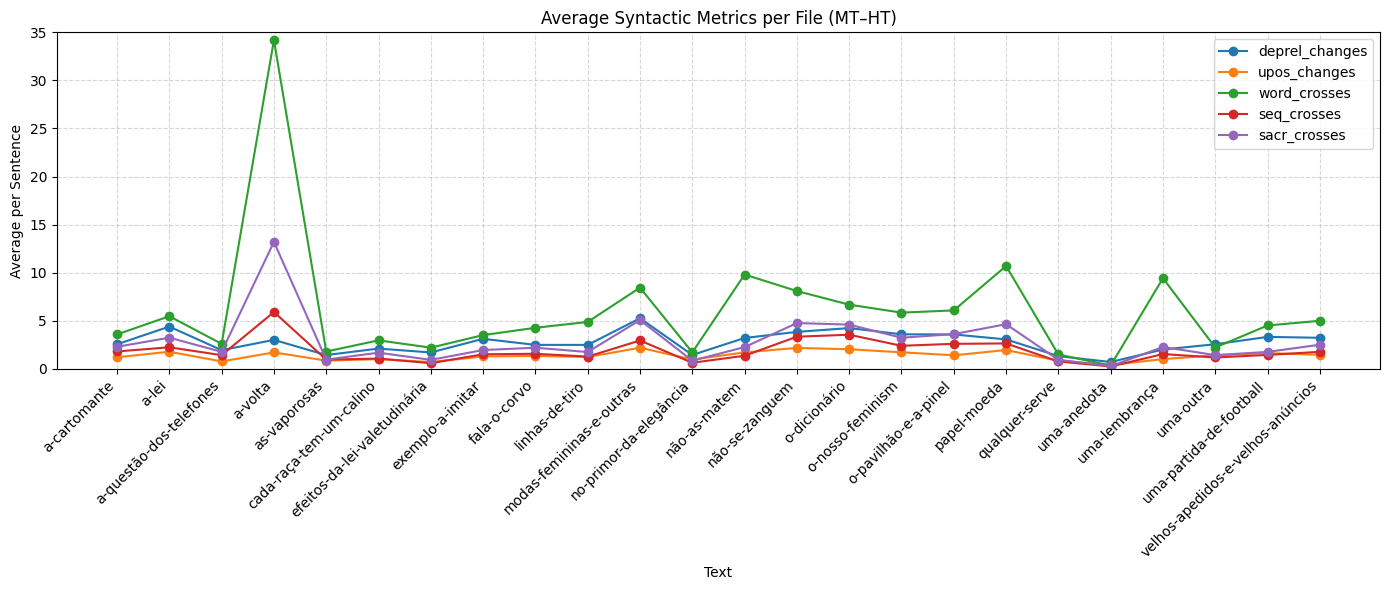

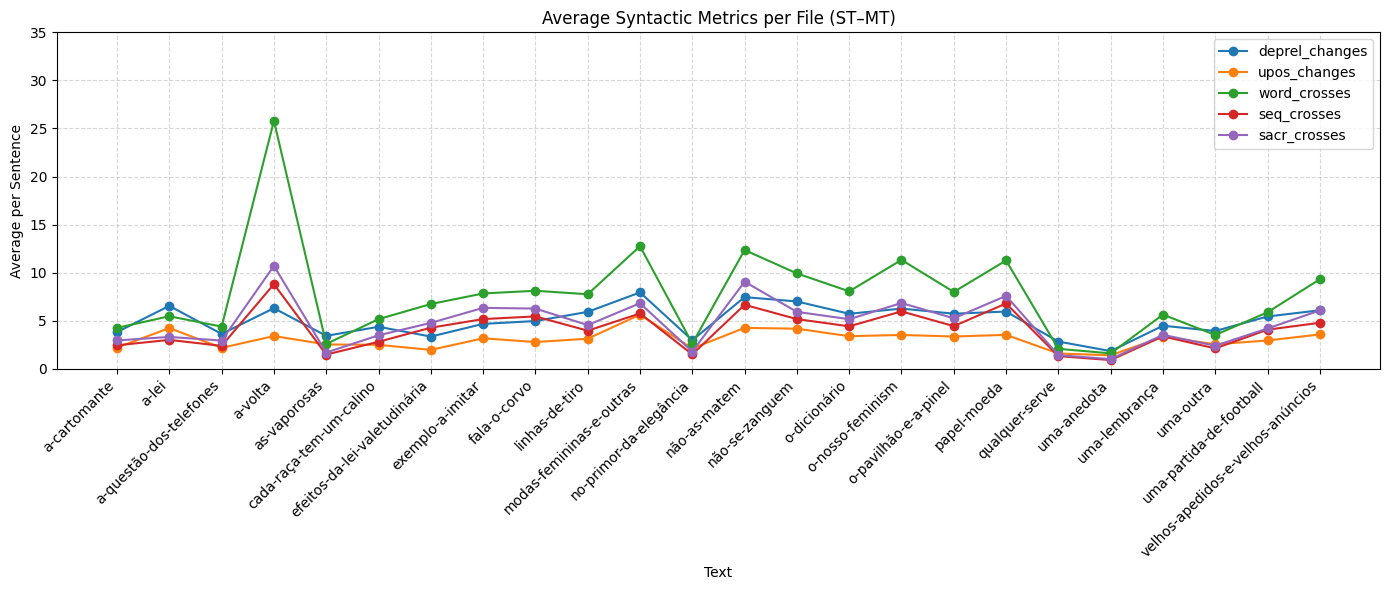

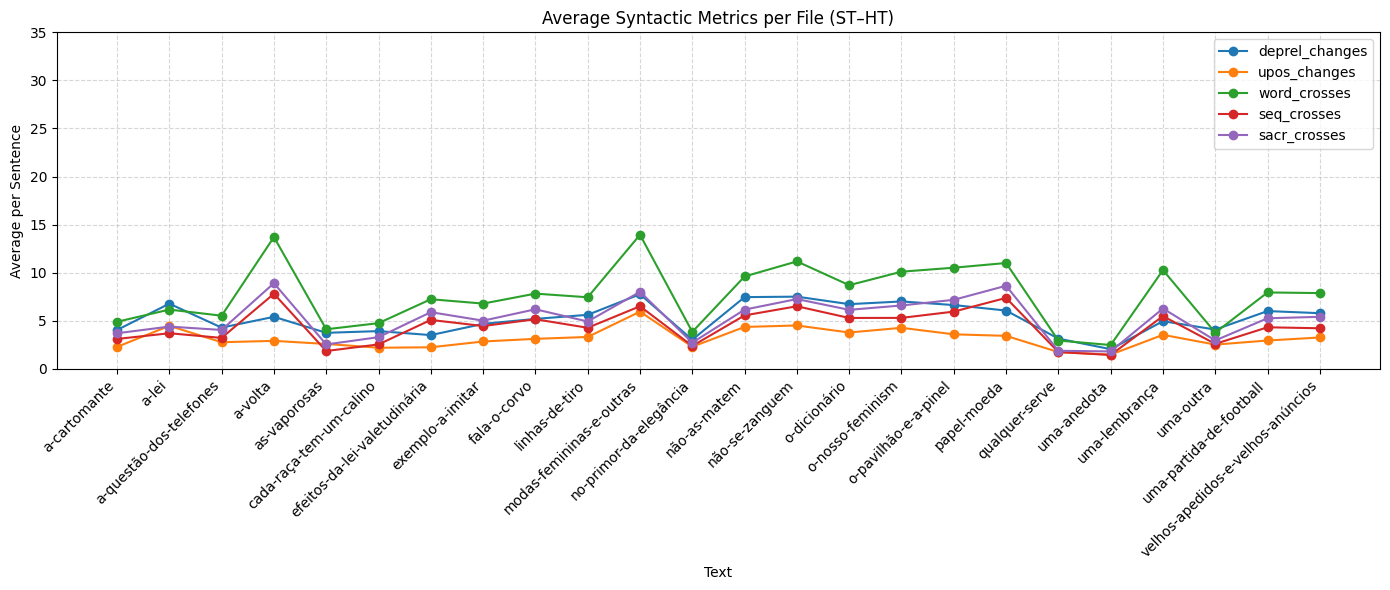

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

def plot_metrics_by_file(aligned_results, dataset_name, strategy='inter', y_max=150):
    metrics = ['deprel_changes', 'upos_changes', 'word_crosses', 'seq_crosses', 'sacr_crosses'] #'word_crosses',
    data = []

    for file_name, file_data in aligned_results.items():
        # Extract clean text name
        base = os.path.basename(file_name).replace(".align.json", "")
        short_name = re.sub(r'_(st|mt)_(ht|mt|pemt)$', '', base)

        file_row = {'file': short_name}
        metric_totals = {metric: 0 for metric in metrics}
        sentence_count = 0

        for sentence_metrics in file_data.values():
            if strategy not in sentence_metrics:
                continue
            for metric in metrics:
                metric_totals[metric] += sentence_metrics[strategy].get(metric, 0)
            sentence_count += 1

        if sentence_count > 0:
            for metric in metrics:
                file_row[metric] = metric_totals[metric] / sentence_count
            data.append(file_row)

    df = pd.DataFrame(data)
    df = df.sort_values("file")

    # Plot
    plt.figure(figsize=(14, 6))
    for metric in metrics:
        plt.plot(df['file'], df[metric], label=metric, marker='o')

    plt.title(f"Average Syntactic Metrics per File ({dataset_name.upper()})")
    plt.xlabel("Text")
    plt.ylabel("Average per Sentence")
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, y_max)  # Fixed y-axis
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage with fixed scale:
plot_metrics_by_file(simple_mt_ht, "MT–HT", y_max=35) #35
plot_metrics_by_file(simple_st_mt, "ST–MT", y_max=35)
plot_metrics_by_file(simple_st_ht, "ST–HT", y_max=35)

In [ ]:
def print_sentences_with_metrics(metrics_dict, json_path, filename_key=None):
    """
    Print sentence pairs with their metric results.

    Args:
      metrics_dict: dict like simple_st_ht with keys=filename, values=dict of sentence index->metrics.
      json_path: path to JSON file with sentence data.
      filename_key: str, key to access metrics_dict (usually the filename e.g. 'a-cartomante_st_ht.align.json').
                    If None, tries to guess from json_path.
    """
    if filename_key is None:
        # Extract filename from path for dict key
        filename_key = json_path.split("/")[-1]

    # Load sentence data from JSON file
    with open(json_path, "r", encoding="utf-8") as f:
        sentence_data = json.load(f)

    if filename_key not in metrics_dict:
        print(f"Filename key '{filename_key}' not found in metrics dict.")
        return

    file_metrics = metrics_dict[filename_key]

    for sentence in sentence_data:
        idx = sentence["index"]

        # Extract src and tgt tokens as strings
        src_tokens = sentence["src"]["tokens"]
        tgt_tokens = sentence["tgt"]["tokens"]

        # Retrieve metrics for this sentence index (if available)
        metrics_for_idx = file_metrics.get(idx, None)

        print(f"\nSentence index: {idx}")
        print(f"SRC: {' '.join(src_tokens)}")
        print(f"TGT: {' '.join(tgt_tokens)}")

        if metrics_for_idx:
            print("Metrics:")
            for strategy, metric_values in metrics_for_idx.items():
                metrics_str = ", ".join(f"{k}: {v}" for k, v in metric_values.items())
                print(f"  {strategy}: {metrics_str}")
        else:
            print("No metrics found for this sentence index.")

In [ ]:
json_path = "/content/a-volta_mt_ht.filtered.json" #/content/a-volta_st_ht.filtered.json #/content/a-volta_st_mt.filtered.json
#json_path = "/content/uma-anedota_mt_ht.filtered.json" #/content/uma-anedota_st_ht.filtered.json #/content/uma-anedota_st_mt.filtered.json
#json_path = "/content/modas-femininas_mt_ht.filtered.json" #/content/modas-femininas_st_ht.filtered.json #/content/modas-femininas_st_mt.filtered.json
#json_path = "/content/o-pavilhão-e-a-pinel_mt_pemt.filtered.json" #"/content/o-pavilhão-e-a-pinel_st_pemt.filtered.json" #"/content/o-pavilhão-e-a-pinel_st_pemt.filtered.json"

In [ ]:
print_sentences_with_metrics(simple_mt_ht, json_path)


Sentence index: 0
SRC: Die Regierung hat beschlossen , Personen und Familien , die sich in Kolonien in den Bundesstaaten Minas und Rio de Janeiro niederlassen möchten , Fahrkarten , Land , landwirtschaftliche Geräte und für einige Monate Unterstützung zu der Verfügung zu stellen .
TGT: Die Regierung hat beschlossen , Reisekosten , Land , Ackergeräte und Zuschüsse für ein paar Monate all jenen Personen und Familien zukommen zu lassen , die sich in kolonialen Siedlungen in den Bundesstaaten Minas und Rio de Janeiro ansiedeln wollten .
Metrics:
  mwmf: deprel_changes: 13, upos_changes: 8, word_crosses: 442, seq_crosses: 162, sacr_crosses: 223
  inter: deprel_changes: 8, upos_changes: 4, word_crosses: 246, seq_crosses: 29, sacr_crosses: 88
  itermax: deprel_changes: 11, upos_changes: 6, word_crosses: 350, seq_crosses: 31, sacr_crosses: 35

Sentence index: 1
SRC: Die Zeitungen haben bereits erbauliche Fotos der ersten veröffentlicht , die sich bei der Polizeibehörde um Fahrkarten bemüht ha

In [ ]:
def generate_latex_tables(aligned_results, dataset_name, strategy='inter'):
    metrics = ['deprel_changes', 'upos_changes', 'word_crosses', 'seq_crosses', 'sacr_crosses']
    latex_tables = []

    for file_name, file_data in aligned_results.items():
        base = os.path.basename(file_name).replace(".align.json", "")
        short_name = re.sub(r'_(st|mt)_(ht|mt|pemt)$', '', base)

        metric_totals = {metric: 0 for metric in metrics}
        sentence_count = 0

        for sentence_metrics in file_data.values():
            if strategy not in sentence_metrics:
                continue
            for metric in metrics:
                metric_totals[metric] += sentence_metrics[strategy].get(metric, 0)
            sentence_count += 1

        if sentence_count == 0:
            continue

        # Compute averages
        metric_averages = {metric: metric_totals[metric] / sentence_count for metric in metrics}

        # Generate LaTeX table
        latex = f"""
\\begin{{table}}[H]
  \\centering
  \\caption{{Syntactic evaluation metrics for {short_name.replace('_', ' ').title()} {dataset_name.upper()}.}}
  \\label{{tab:{short_name}_{dataset_name.lower()}_metrics}}
  \\vspace{{0.5em}}
  \\begin{{tabular}}{{|l|c|}}
    \\hline
    \\textbf{{Metric}} & \\textbf{{Average per Sentence}} \\\\
    \\hline
    Dependency Label Changes  & {metric_averages['deprel_changes']:.2f} \\\\
    POS Tag Changes & {metric_averages['upos_changes']:.2f} \\\\
    Word Cross & {metric_averages['word_crosses']:.2f} \\\\
    Sequence Crossings & {metric_averages['seq_crosses']:.2f} \\\\
    Syntactically Aware Cross & {metric_averages['sacr_crosses']:.2f} \\\\
    \\hline
  \\end{{tabular}}
\\end{{table}}
"""
        latex_tables.append(latex.strip())

    return latex_tables

In [ ]:
def generate_latex_summary(aligned_results, dataset_name, strategy='inter'):
    metrics = ['deprel_changes', 'upos_changes', 'word_crosses', 'seq_crosses', 'sacr_crosses']
    metric_totals = {metric: 0 for metric in metrics}
    sentence_count = 0

    # Aggregate across all files
    for file_data in aligned_results.values():
        for sentence_metrics in file_data.values():
            if strategy not in sentence_metrics:
                continue
            for metric in metrics:
                metric_totals[metric] += sentence_metrics[strategy].get(metric, 0)
            sentence_count += 1

    if sentence_count == 0:
        return None  # nothing to report

    # Compute averages
    metric_averages = {metric: metric_totals[metric] / sentence_count for metric in metrics}

    # Generate single LaTeX table
    latex = f"""
\\begin{{table}}[H]
  \\centering
  \\caption{{Average syntactic evaluation metrics for {dataset_name.upper()} ({strategy}).}}
  \\label{{tab:{dataset_name.lower()}_{strategy}_metrics}}
  \\vspace{{0.5em}}
  \\begin{{tabular}}{{|l|c|}}
    \\hline
    \\textbf{{Metric}} & \\textbf{{Average per Sentence}} \\\\
    \\hline
    Dependency Label Changes & {metric_averages['deprel_changes']:.2f} \\\\
    POS Tag Changes          & {metric_averages['upos_changes']:.2f} \\\\
    Word Crosses             & {metric_averages['word_crosses']:.2f} \\\\
    Sequence Crossings       & {metric_averages['seq_crosses']:.2f} \\\\
    Syntactically Aware Cross & {metric_averages['sacr_crosses']:.2f} \\\\
    \\hline
  \\end{{tabular}}
\\end{{table}}
"""
    return latex.strip()

In [ ]:
latex_mt_ht_sum = generate_latex_summary(simple_mt_ht, "MT–HT")
latex_st_mt_sum = generate_latex_summary(simple_st_mt, "ST–MT")
latex_st_ht_sum = generate_latex_summary(simple_st_ht, "ST–HT")

In [ ]:
print(latex_mt_ht_sum)

\begin{table}[H]
  \centering
  \caption{Average syntactic evaluation metrics for MT–HT (inter).}
  \label{tab:mt–ht_inter_metrics}
  \vspace{0.5em}
  \begin{tabular}{|l|c|}
    \hline
    \textbf{Metric} & \textbf{Average per Sentence} \\
    \hline
    Dependency Label Changes & 2.49 \\
    POS Tag Changes          & 1.24 \\
    Word Crosses             & 4.20 \\
    Sequence Crossings       & 1.54 \\
    Syntactically Aware Cross & 2.17 \\
    \hline
  \end{tabular}
\end{table}


In [ ]:
print(latex_st_mt_sum)

\begin{table}[H]
  \centering
  \caption{Average syntactic evaluation metrics for ST–MT (inter).}
  \label{tab:st–mt_inter_metrics}
  \vspace{0.5em}
  \begin{tabular}{|l|c|}
    \hline
    \textbf{Metric} & \textbf{Average per Sentence} \\
    \hline
    Dependency Label Changes & 4.45 \\
    POS Tag Changes          & 2.70 \\
    Word Crosses             & 5.94 \\
    Sequence Crossings       & 3.26 \\
    Syntactically Aware Cross & 3.89 \\
    \hline
  \end{tabular}
\end{table}


In [ ]:
print(latex_st_ht_sum)

\begin{table}[H]
  \centering
  \caption{Average syntactic evaluation metrics for ST–HT (inter).}
  \label{tab:st–ht_inter_metrics}
  \vspace{0.5em}
  \begin{tabular}{|l|c|}
    \hline
    \textbf{Metric} & \textbf{Average per Sentence} \\
    \hline
    Dependency Label Changes & 4.57 \\
    POS Tag Changes          & 2.77 \\
    Word Crosses             & 6.12 \\
    Sequence Crossings       & 3.60 \\
    Syntactically Aware Cross & 4.31 \\
    \hline
  \end{tabular}
\end{table}


In [ ]:
# Generate LaTeX for each dataset
latex_mt_ht = generate_latex_tables(simple_mt_ht, "MT–HT")
latex_st_mt = generate_latex_tables(simple_st_mt, "ST–MT")
latex_st_ht = generate_latex_tables(simple_st_ht, "ST–HT")

# Print one example (e.g., first MT–HT table)
print(latex_mt_ht[0])

\begin{table}[H]
  \centering
  \caption{Syntactic evaluation metrics for Papel-Moeda MT–HT.}
  \label{tab:papel-moeda_mt–ht_metrics}
  \vspace{0.5em}
  \begin{tabular}{|l|c|}
    \hline
    \textbf{Metric} & \textbf{Average per Sentence} \\
    \hline
    Dependency Label Changes  & 3.05 \\
    POS Tag Changes & 1.95 \\
    Word Cross & 10.68 \\
    Sequence Crossings & 2.63 \\
    Syntactically Aware Cross & 4.63 \\
    \hline
  \end{tabular}
\end{table}


In [ ]:
datasets = {
    "MT–HT": simple_mt_ht,
    "ST–MT": simple_st_mt,
    "ST–HT": simple_st_ht,
}

all_latex_tables = {}

for name, data in datasets.items():
    tables = generate_latex_tables(data, name)
    all_latex_tables[name] = tables

# Optionally: Print all tables for copy-pasting into LaTeX
for name, tables in all_latex_tables.items():
    print(f"% ====== Tables for {name} ======")
    for table in tables:
        print(table)
        print("\n")

% ====== Tables for MT–HT ======
\begin{table}[H]
  \centering
  \caption{Syntactic evaluation metrics for Papel-Moeda MT–HT.}
  \label{tab:papel-moeda_mt–ht_metrics}
  \vspace{0.5em}
  \begin{tabular}{|l|c|}
    \hline
    \textbf{Metric} & \textbf{Average per Sentence} \\
    \hline
    Dependency Label Changes  & 3.05 \\
    POS Tag Changes & 1.95 \\
    Word Cross & 10.68 \\
    Sequence Crossings & 2.63 \\
    Syntactically Aware Cross & 4.63 \\
    \hline
  \end{tabular}
\end{table}


\begin{table}[H]
  \centering
  \caption{Syntactic evaluation metrics for Qualquer-Serve MT–HT.}
  \label{tab:qualquer-serve_mt–ht_metrics}
  \vspace{0.5em}
  \begin{tabular}{|l|c|}
    \hline
    \textbf{Metric} & \textbf{Average per Sentence} \\
    \hline
    Dependency Label Changes  & 1.31 \\
    POS Tag Changes & 0.83 \\
    Word Cross & 1.48 \\
    Sequence Crossings & 0.76 \\
    Syntactically Aware Cross & 0.93 \\
    \hline
  \end{tabular}
\end{table}


\begin{table}[H]
  \centering
  \cap

In [ ]:
latex_mt_ht = generate_latex_tables(simple_mt_ht, "MT–HT")
latex_st_mt = generate_latex_tables(simple_st_mt, "ST–MT")
latex_st_ht = generate_latex_tables(simple_st_ht, "ST–HT")

for table in latex_mt_ht:
    print(table, "\n")

for table in latex_st_mt:
    print(table, "\n")

for table in latex_st_ht:
    print(table, "\n")

\begin{table}[H]
  \centering
  \caption{Syntactic evaluation metrics for Papel-Moeda MT–HT.}
  \label{tab:papel-moeda_mt–ht_metrics}
  \vspace{0.5em}
  \begin{tabular}{|l|c|}
    \hline
    \textbf{Metric} & \textbf{Average per Sentence} \\
    \hline
    Dependency Label Changes  & 3.05 \\
    POS Tag Changes & 1.95 \\
    Word Cross & 10.68 \\
    Sequence Crossings & 2.63 \\
    Syntactically Aware Cross & 4.63 \\
    \hline
  \end{tabular}
\end{table} 

\begin{table}[H]
  \centering
  \caption{Syntactic evaluation metrics for Qualquer-Serve MT–HT.}
  \label{tab:qualquer-serve_mt–ht_metrics}
  \vspace{0.5em}
  \begin{tabular}{|l|c|}
    \hline
    \textbf{Metric} & \textbf{Average per Sentence} \\
    \hline
    Dependency Label Changes  & 1.31 \\
    POS Tag Changes & 0.83 \\
    Word Cross & 1.48 \\
    Sequence Crossings & 0.76 \\
    Syntactically Aware Cross & 0.93 \\
    \hline
  \end{tabular}
\end{table} 

\begin{table}[H]
  \centering
  \caption{Syntactic evaluation metrics

In [ ]:
def save_latex_tables_to_files(all_latex_tables, output_dir="/content/latex_tables"):
    import os
    os.makedirs(output_dir, exist_ok=True)

    for dataset_name, tables in all_latex_tables.items():
        filename = dataset_name.lower().replace('–', '_').replace('-', '_') + ".tex"
        file_path = os.path.join(output_dir, filename)

        with open(file_path, 'w', encoding='utf-8') as f:
            for table in tables:
                f.write(table + "\n\n")

        print(f"Saved {len(tables)} tables for {dataset_name} to {file_path}")

# Run save function as before
save_latex_tables_to_files(all_latex_tables)

Saved 23 tables for MT–HT to /content/latex_tables/mt_ht.tex
Saved 23 tables for ST–MT to /content/latex_tables/st_mt.tex
Saved 23 tables for ST–HT to /content/latex_tables/st_ht.tex


In [ ]:
from google.colab import files

files.download('/content/latex_tables/mt_ht.tex')
files.download('/content/latex_tables/st_mt.tex')
files.download('/content/latex_tables/st_ht.tex')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

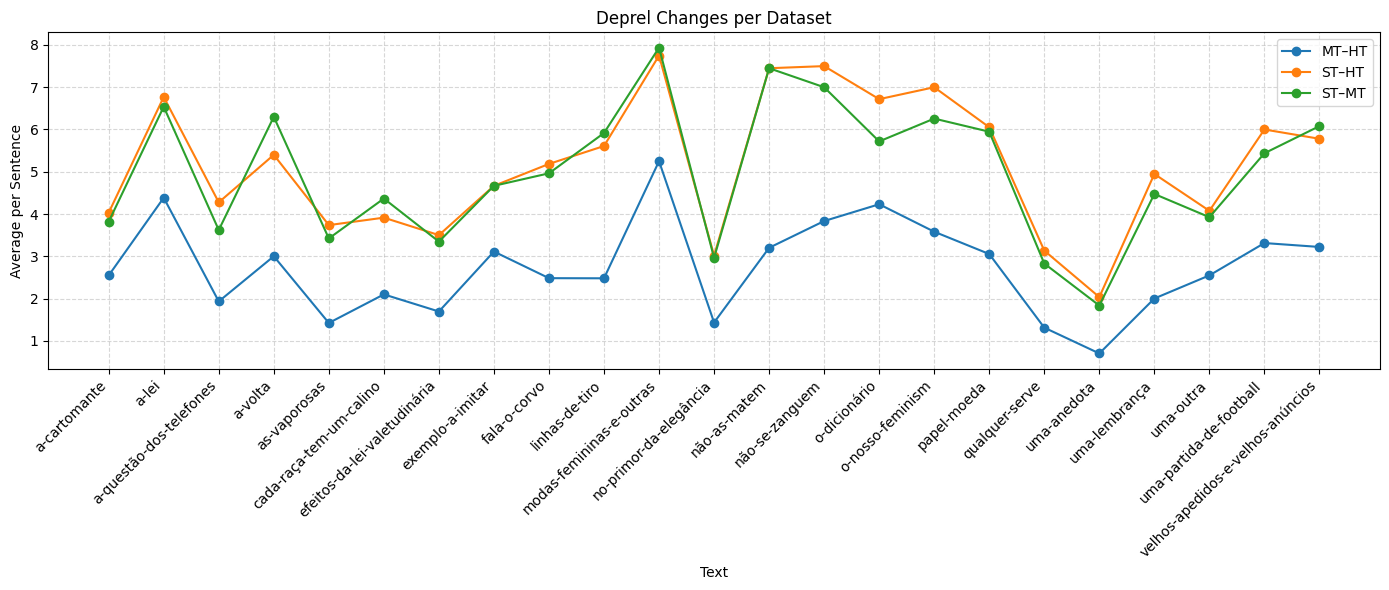

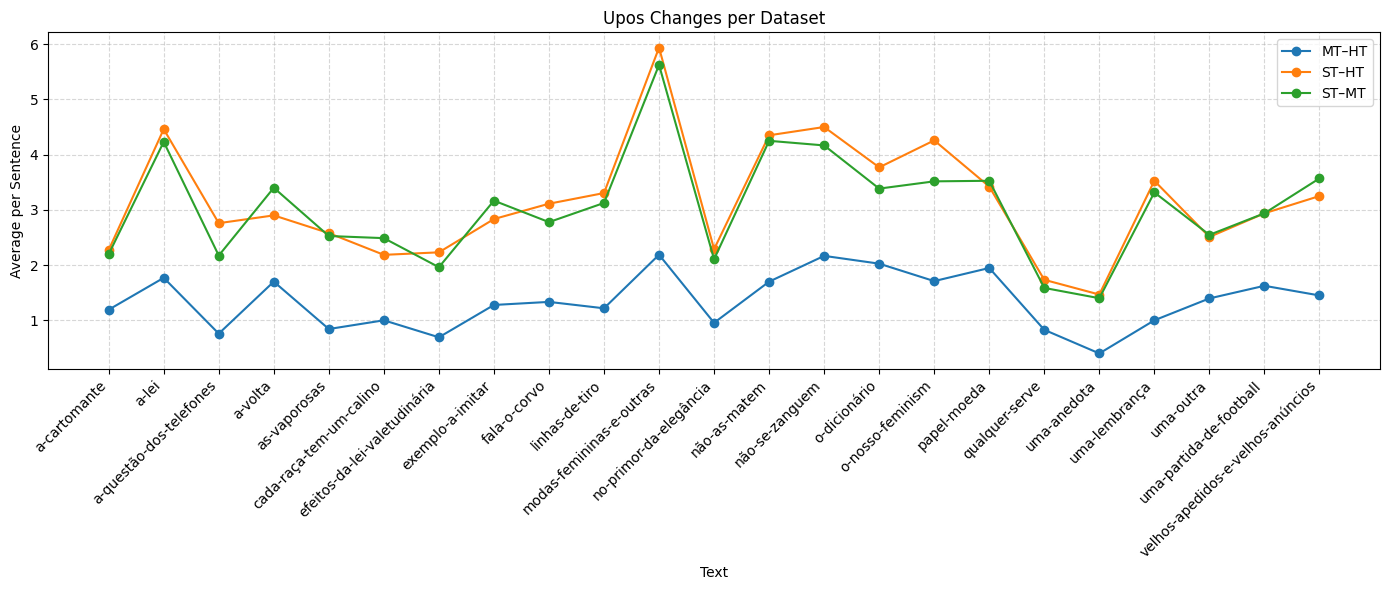

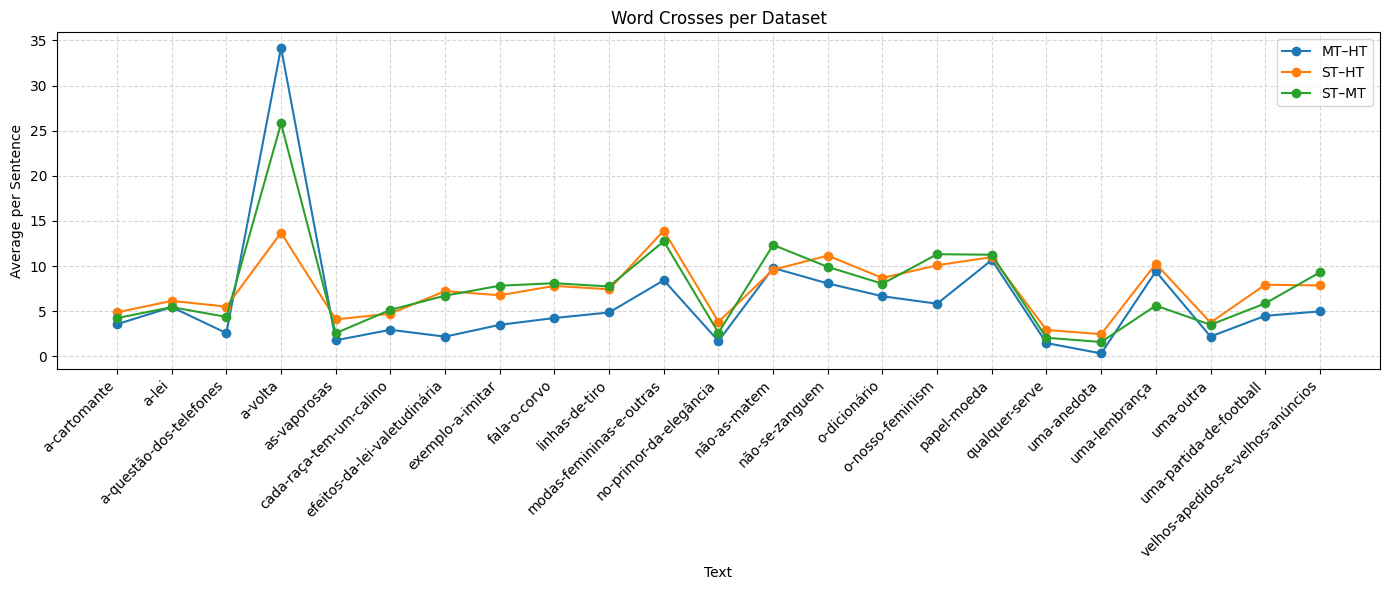

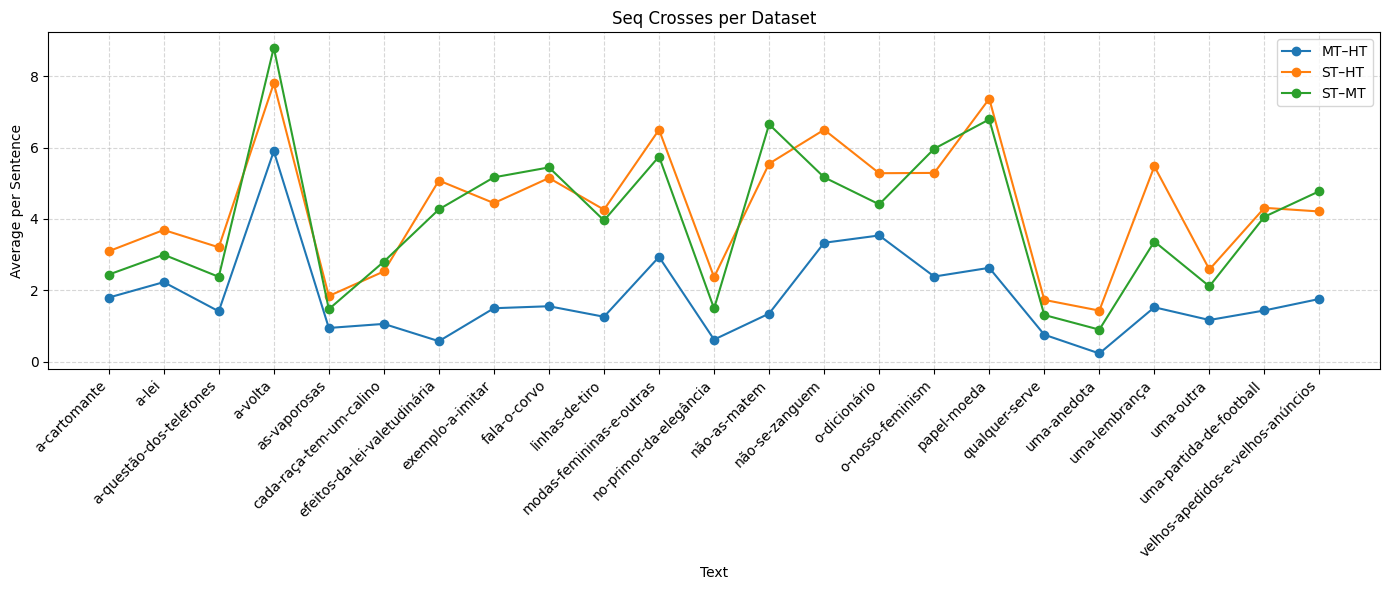

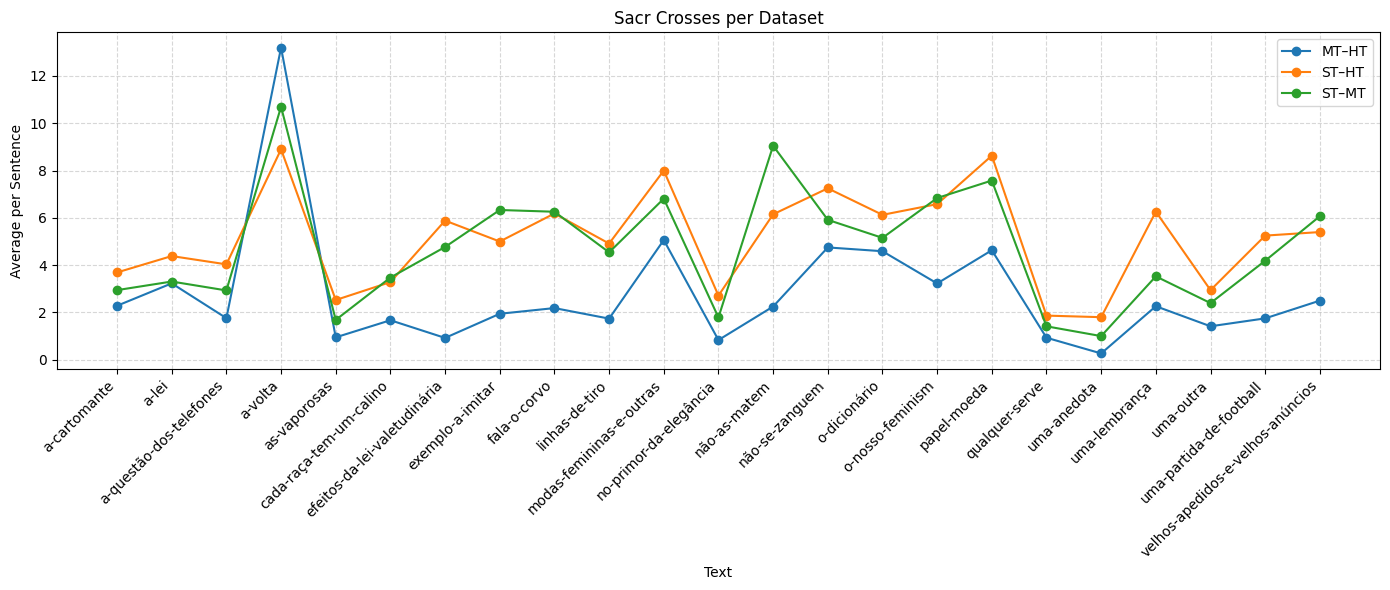

In [ ]:
def plot_metric_comparison_across_datasets(mt_ht_data, st_ht_data, st_mt_data, strategy='inter'):
    datasets = {
        "MT–HT": mt_ht_data,
        "ST–HT": st_ht_data,
        "ST–MT": st_mt_data
    }

    metrics = ['deprel_changes', 'upos_changes', 'word_crosses', 'seq_crosses', 'sacr_crosses']

    data_by_metric = {metric: {} for metric in metrics}

    for dataset_name, aligned_results in datasets.items():
        for file_name, file_data in aligned_results.items():
            # Clean file name
            base = os.path.basename(file_name).replace(".align.json", "")
            short_name = re.sub(r'_(st|mt)_(ht|mt|pemt)$', '', base)

            metric_totals = {metric: 0 for metric in metrics}
            sentence_count = 0

            for sentence_metrics in file_data.values():
                if strategy not in sentence_metrics:
                    continue
                for metric in metrics:
                    metric_totals[metric] += sentence_metrics[strategy].get(metric, 0)
                sentence_count += 1

            if sentence_count > 0:
                for metric in metrics:
                    avg = metric_totals[metric] / sentence_count
                    data_by_metric[metric].setdefault(short_name, {})[dataset_name] = avg

    # Plot each metric across datasets
    for metric in metrics:
        plt.figure(figsize=(14, 6))
        text_names = sorted(data_by_metric[metric].keys())

        for dataset_name in datasets:
            values = [data_by_metric[metric].get(text, {}).get(dataset_name, 0) for text in text_names]
            plt.plot(text_names, values, label=dataset_name, marker='o')

        plt.title(f"{metric.replace('_', ' ').title()} per Dataset")
        plt.xlabel("Text")
        plt.ylabel("Average per Sentence")
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Example usage
plot_metric_comparison_across_datasets(simple_mt_ht, simple_st_ht, simple_st_mt)